<a href="https://colab.research.google.com/github/Yolde/Facies-Analysis-/blob/main/Facies_Analysis_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving facies_vectors.csv to facies_vectors.csv


In [ ]:
filename = 'facies_vectors.csv'
training_data = pd.read_csv(filename)
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [ ]:
blind = training_data[training_data['Well Name'] == 'SHANKLE']
training_data = training_data[training_data['Well Name'] != 'SHANKLE']

In [ ]:
#Remove a single well to use as a blind test later.

In [ ]:
blind

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,2,A1 SH,SHANKLE,2774.5,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,2,A1 SH,SHANKLE,2775.0,97.57,0.631,7.9,16.745,3.2,1,0.984
939,2,A1 SH,SHANKLE,2775.5,98.41,0.615,12.8,14.105,3.2,1,0.968
940,2,A1 SH,SHANKLE,2776.0,85.92,0.597,13.0,13.385,3.4,1,0.952
941,2,A1 SH,SHANKLE,2776.5,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...,...,...,...,...
1381,8,C LM,SHANKLE,3006.0,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,8,C LM,SHANKLE,3006.5,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,8,C LM,SHANKLE,3007.0,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,4,C LM,SHANKLE,3007.5,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [ ]:
# clean up this dataset. The 'Well Name' and 'Formation' columns can be turned into a categorical data type.

In [ ]:
training_data['Well Name'] = training_data['Well Name'].astype('category')
training_data['Formation'] = training_data['Formation'].astype('category')
training_data['Well Name'].unique()

['SHRIMPLIN', 'ALEXANDER D', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (9, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NEWBY',
                         'NOLAN', 'Recruit F9', 'SHRIMPLIN']

In [ ]:
# define a color map and abbreviated facies namesso the facies are represented by consistent color in all the plots

In [ ]:
# 1=sandstone  2=c_siltstone   3=f_siltstone
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

In [ ]:
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]

training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,2783.000000,3700.000000,3700.000000
mean,4.615676,2908.853378,64.873649,0.663053,4.651677,12.892826,3.805693,1.540000,0.524125
std,2.475808,139.010855,30.817166,0.253863,5.109006,6.796219,0.894118,0.498465,0.287147
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2818.500000,43.778250,0.502000,1.800000,8.350000,3.200000,1.000000,0.278000
50%,4.000000,2939.000000,64.817000,0.645613,4.400000,11.857500,3.600000,2.000000,0.531000
75%,7.000000,3015.125000,80.322500,0.823000,7.600000,15.750000,4.400000,2.000000,0.772000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [ ]:
# PE has some invalid entries

In [ ]:
#create plots for the five well log variables, as well as a log for facies labels

In [ ]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)


In [ ]:
#show log plots for wells SHRIMPLIN.

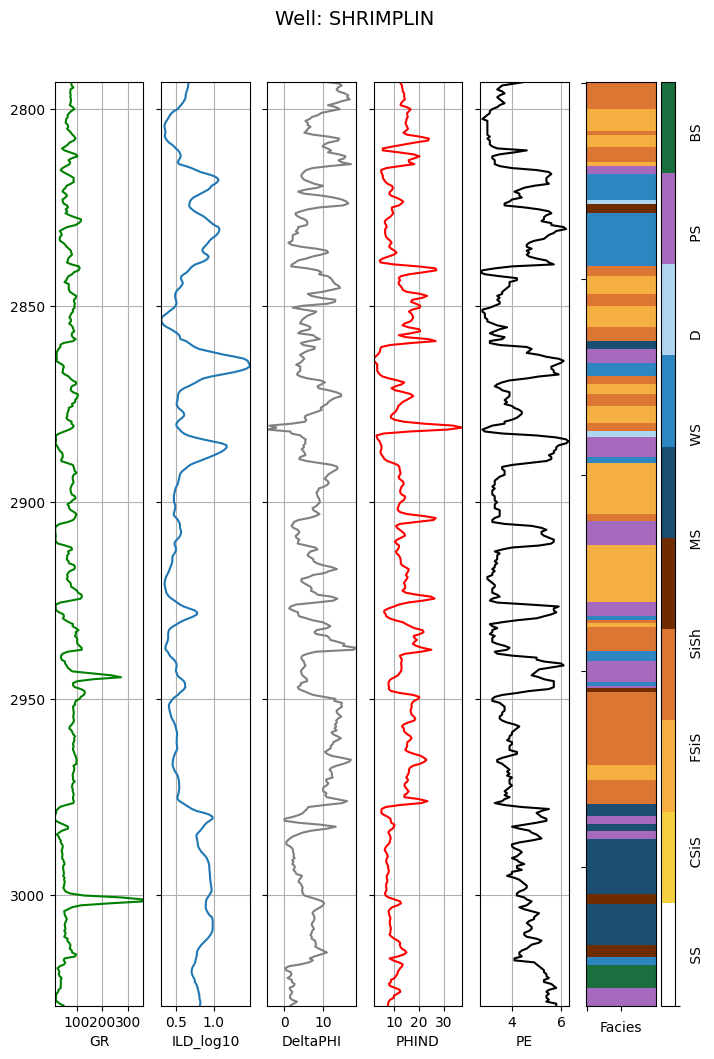

In [ ]:
make_facies_log_plot(
    training_data[training_data['Well Name'] == 'SHRIMPLIN'],
    facies_colors)

In [ ]:
# we can look at how the various facies are represented by the entire training set. Let's plot a histgram of the number of training examples for each facies class

,count
SS,179
CSiS,851
FSiS,663
SiSh,264
MS,277
WS,511
D,124
PS,646
BS,185


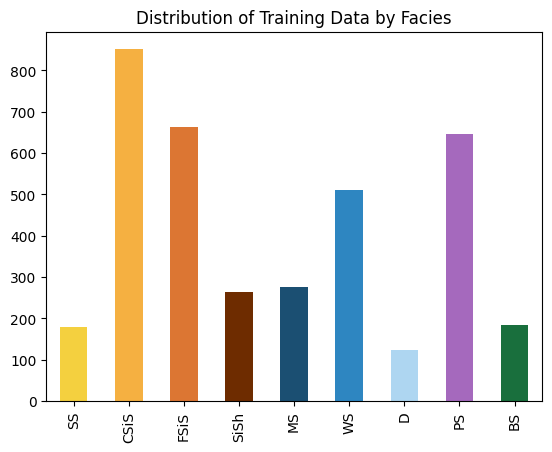

In [ ]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors,
                   title='Distribution of Training Data by Facies')
facies_counts

In [ ]:
# This shows the distribution of examples by facies for the 3232 training examples in the training set. Dolomite (facies 7) has the fewest with 141 examples.
#There are also only 185 bafflestone examples. Depending on the performance of the classifier we are going to train, we may consider getting more examples of these facies.

# Crossplots are a familiar tool in the geosciences to visualize how two properties vary with rock type. This dataset contains 5 log variables, and
#scatter matrix can help to quickly visualize the variation between the all the variables in the dataset. We can employ the very useful Seaborn library to quickly
#create a nice looking scatter matrix. Each pane in the plot shows the relationship between two of the variables on the x and y axis, with each point is colored according
#to its facies. The same colormap is used to represent the 9 facies.

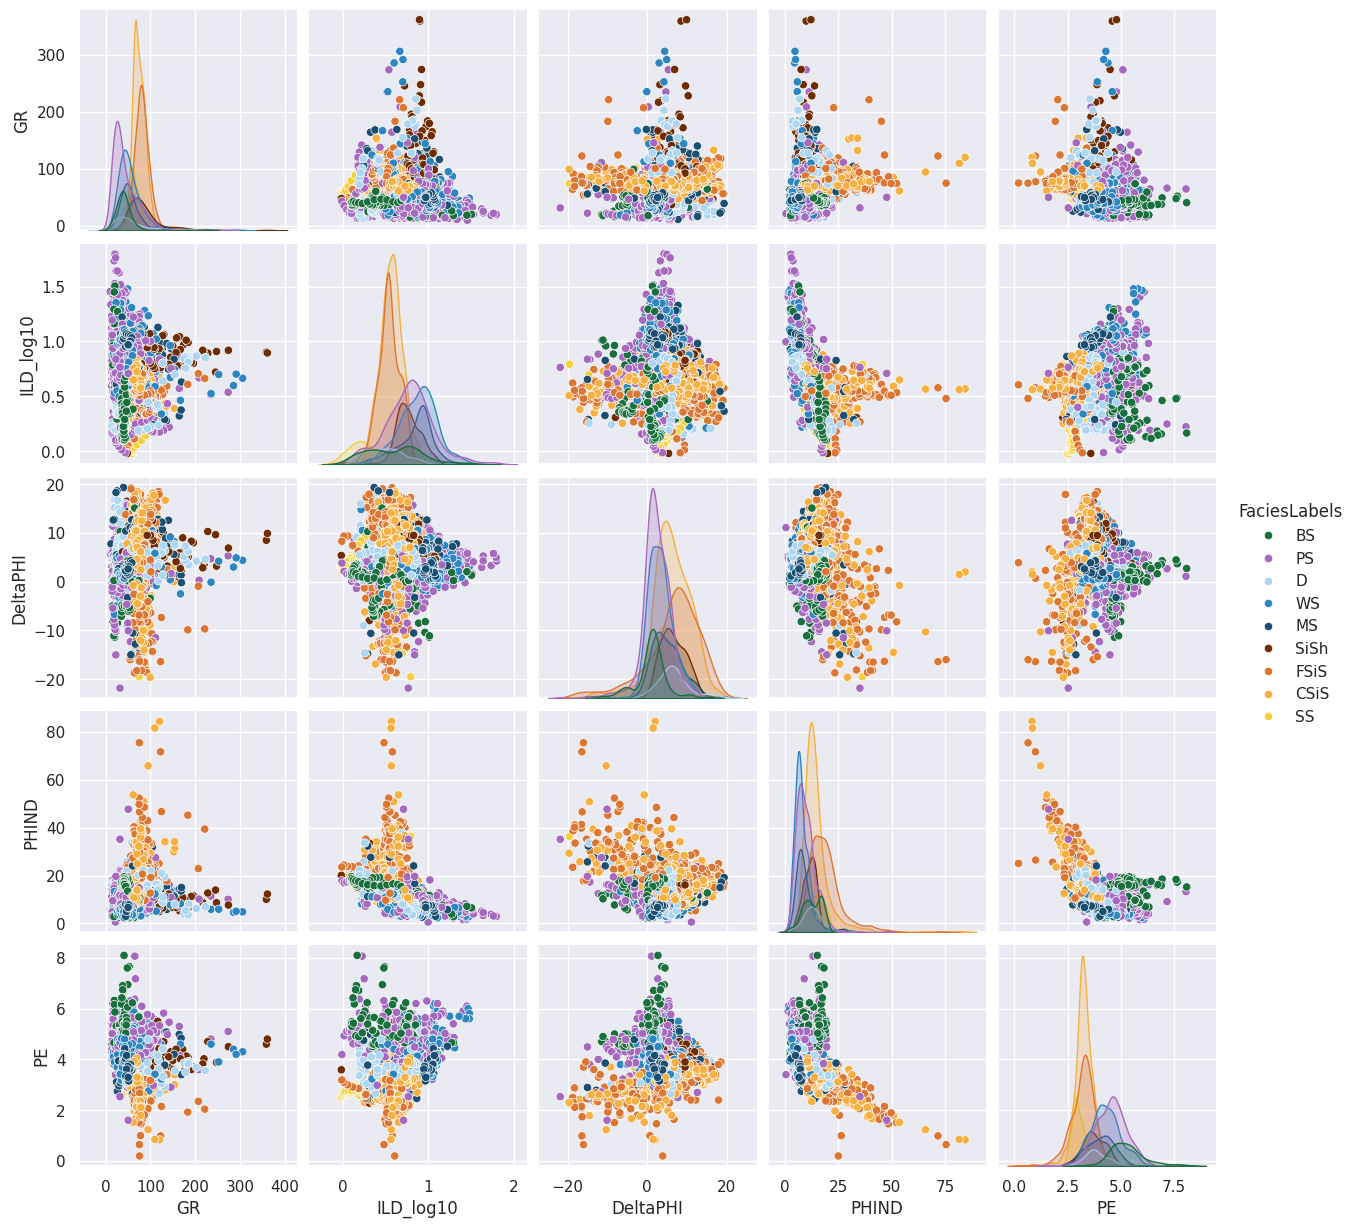

In [ ]:
#save plot display settings to change back to when done plotting with seaborn
inline_rc = dict(mpl.rcParams)

import seaborn as sns
sns.set()
sns.pairplot(training_data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))

#switch back to default matplotlib plot style
mpl.rcParams.update(inline_rc)

In [ ]:
# Conditioning the data set
# Now we extract just the feature variables we need to perform the classification. The predictor variables are the five wireline values and two geologic constraining variables.
# We also get a vector of the facies labels that correspond to each feature vector.

In [ ]:
correct_facies_labels = training_data['Facies'].values

feature_vectors = training_data.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)
feature_vectors.describe()

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3700.000000,3700.000000,3700.000000,3700.000000,2783.000000,3700.000000,3700.000000
mean,64.873649,0.663053,4.651677,12.892826,3.805693,1.540000,0.524125
std,30.817166,0.253863,5.109006,6.796219,0.894118,0.498465,0.287147
min,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,43.778250,0.502000,1.800000,8.350000,3.200000,1.000000,0.278000
50%,64.817000,0.645613,4.400000,11.857500,3.600000,2.000000,0.531000
75%,80.322500,0.823000,7.600000,15.750000,4.400000,2.000000,0.772000
max,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [ ]:
# We use the standardScalar module in scikit to standardized the data into a a normally distributed data}

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [ ]:
feature_vectors

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,78.260,0.661,14.200,12.565,4.100,1,0.979
2,79.050,0.658,14.800,13.050,3.600,1,0.957
3,86.100,0.655,13.900,13.115,3.500,1,0.936
4,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...
4144,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,51.469,0.965,3.083,7.708,3.152,2,0.661


In [ ]:
# Scikit also includes a handy function to randomly split the training data into training and test sets. The test set contains a small subset of
#feature vectors that are not used to train the network. Because we know the true facies labels for these examples, we can compare the results
#of the classifier to the actual facies and determine the accuracy of the model. Let's use 20% of the data for the test set.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, correct_facies_labels, test_size=0.2, random_state=42
)

# Convert NaN values in X_train to 0
X_train = np.nan_to_num(X_train, nan=0.0)
X_test = np.nan_to_num(X_test, nan=0.0)

In [ ]:
#  we use the cleaned and conditioned training set to create a facies classifier using SVM

In [ ]:
from sklearn import svm

clf = svm.SVC()

In [ ]:
# Now we can train the classifier using the training set we created above.

In [ ]:
X_train


array([[ 0.00455492,  0.05494734,  1.02819074, ...,  0.        ,
         0.92295821, -0.16761904],
       [ 0.17448319, -0.37841528,  0.01102574, ..., -1.57803177,
        -1.08347268,  0.12147019],
       [ 0.21907476,  0.05494734,  1.56496256, ...,  0.        ,
        -1.08347268,  0.96087386],
       ...,
       [-0.56708689,  0.95712954,  0.10733929, ...,  0.        ,
         0.92295821,  0.51504951],
       [ 0.24143545, -0.07112178, -0.07647864, ..., -1.2379709 ,
        -1.08347268,  1.15940502],
       [-0.38664358, -1.27271816, -1.9481327 , ...,  0.88852816,
         0.92295821, -0.77366152]])

In [ ]:
clf.fit(X_train,y_train)

SVC()

In [ ]:
#Now that the model has been trained on our data, we can use it to predict the facies of the feature vectors in the test set. Because we know the true facies labels of the vectors in the test
# set, we can use the results to evaluate the accuracy of the classifier

In [ ]:
predicted_labels = clf.predict(X_test)

In [ ]:

#You can use seaborn or matplotlib to display the confusion matrix with these steps:

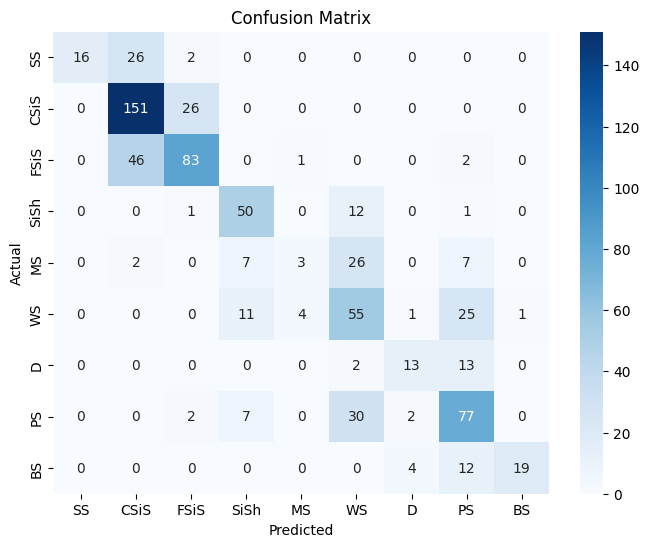

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=facies_labels, yticklabels=facies_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# We calculate accuracy

In [ ]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

In [ ]:
adjacent_facies = [[1], [0, 2], [1], [4], [3, 5], [4, 6, 7], [5, 7], [5, 6, 8], [6, 7]]

def accuracy_adjacent(conf, adjacent_facies):
    nb_classes = conf.shape[0]
    total_correct = 0.0
    for i in np.arange(0, nb_classes):
        total_correct += conf[i][i]  # Add the correctly classified entries (diagonal)
        for j in adjacent_facies[i]:
            total_correct += conf[i][j]  # Add the entries where adjacent classes are considered correct
    return total_correct / sum(sum(conf))

In [ ]:
print('Facies classification accuracy = %f' % accuracy(conf))
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(conf, adjacent_facies))

Facies classification accuracy = 0.631081
Adjacent facies classification accuracy = 0.933784


In [ ]:
#The classifier so far has been built with the default parameters. However, we may be able to get improved classification results with optimal parameter choices.

#We will consider two parameters. The parameter C is a regularization factor, and tells the classifier how much we want to avoid misclassifying training examples.
#A large value of C will try to correctly classify more examples from the training set, but if C is too large it may 'overfit' the data and fail to generalize when
#classifying new data. If C is too small then the model will not be good at fitting outliers and will have a large error on the training set.

#The SVM learning algorithm uses a kernel function to compute the distance between feature vectors. Many kernel functions exist, but in this case we are using the radial
#basis function rbf kernel (the default). The gamma parameter describes the size of the radial basis functions, which is how far away two vectors in the feature space need to be to be considered close.

#We will train a series of classifiers with different values for C and gamma. Two nested loops are used to train a classifier for every possible combination of values
#in the ranges specified. The classification accuracy is recorded for each combination of parameter values. The results are shown in a series of plots, so the parameter
#values that give the best classification accuracy on the test set can be selected.

#This process is also known as 'cross validation'. Often a separate 'cross validation' dataset will be created in addition to the training and test sets to do model selection.
# For this tutorial we will just use the test set to choose model parameters.

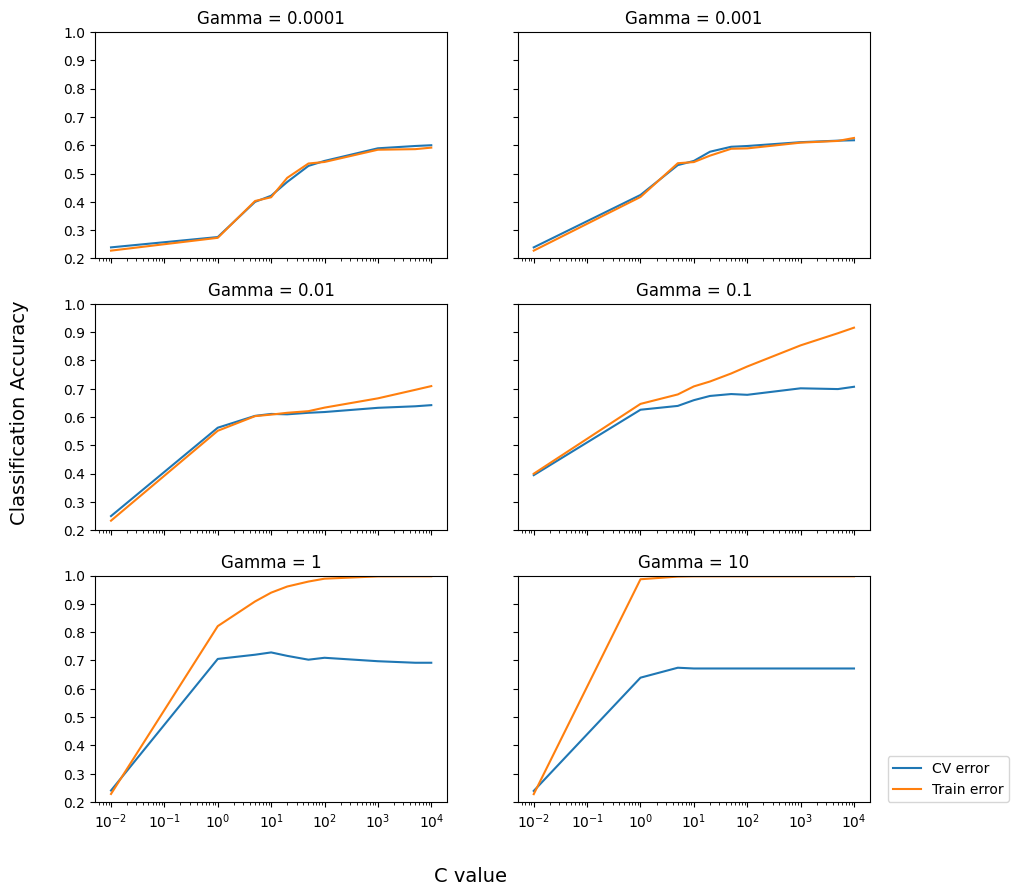

In [ ]:
#model selection takes a few minutes, change this variable
#to true to run the parameter loop
do_model_selection = True

if do_model_selection:
    C_range = np.array([.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000])
    gamma_range = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10])

    fig, axes = plt.subplots(3, 2,
                        sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0
    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):

            clf = svm.SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_train,y_train)

            train_conf = confusion_matrix(y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(y_test, clf.predict(X_test))

            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)

        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([0.2,1])

    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)

    fig.text(0.04, 0.5, 'Classification Accuracy', va='center',
             rotation='vertical', fontsize=14)

In [ ]:
# The best accuracy on the cross validation error curve was achieved for gamma = 1, and C = 10. We can now create and train an optimized classifier based on these parameters:

In [ ]:
clf = svm.SVC(C=10, gamma=1)
clf.fit(X_train, y_train)

cv_conf = confusion_matrix(y_test, clf.predict(X_test))

print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(cv_conf, adjacent_facies))

Optimized facies classification accuracy = 0.73
Optimized adjacent facies classification accuracy = 0.93


In [ ]:
#Precision and recall are metrics that give more insight into how the classifier performs for individual facies. Precision is the probability that given a classification result
#for a sample, the sample actually belongs to that class. Recall is the probability that a sample will be correctly classified for a given class.

#Precision and recall can be computed easily using the confusion matrix. The code to do so has been added to the display_confusion_matrix() function:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def display_cm(conf_matrix, labels, hide_zeros=False, display_metrics=False, y_true=None, y_pred=None):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    if hide_zeros:
        plt.gca().xaxis.set_ticks_position('none')
        plt.gca().yaxis.set_ticks_position('none')
    plt.show()

    if display_metrics and y_true is not None and y_pred is not None:
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')

        print("Accuracy: ", accuracy)
        print("Precision: ", precision)
        print("Recall: ", recall)
        print("F1 Score: ", f1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def display_adj_cm(conf_matrix, labels, adjacent_facies, display_metrics=False, hide_zeros=False):
    # Create the adjusted confusion matrix
    adj_matrix = conf_matrix.copy().astype(float)  # Cast to float to handle NaN replacement

    for i in range(len(adjacent_facies)):
        for j in adjacent_facies[i]:
            adj_matrix[i][j] += conf_matrix[i][j]

    # If hide_zeros is True, replace all zeros with NaN
    if hide_zeros:
        adj_matrix[adj_matrix == 0] = float('nan')

    # Plot the adjusted confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(adj_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=True)
    plt.title("Adjusted Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Display additional metrics if display_metrics is True
    if display_metrics:
        accuracy = np.trace(adj_matrix) / np.sum(adj_matrix)
        print(f"Accuracy: {accuracy:.4f}")
        # You can calculate other metrics like Precision, Recall, F1 Score if needed.



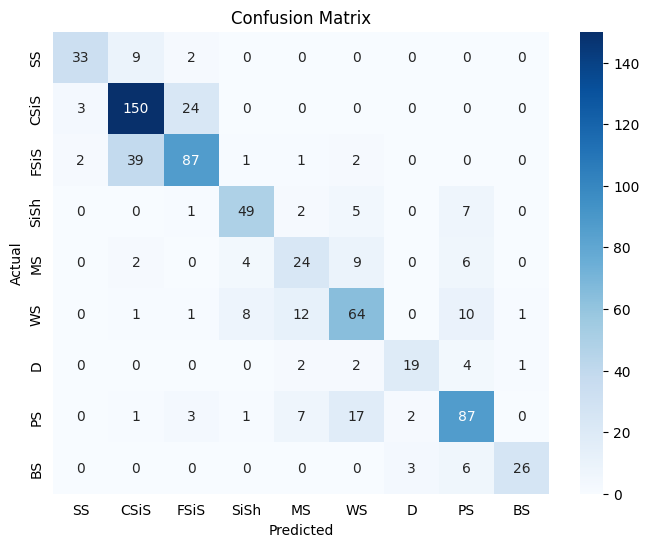

In [ ]:
display_cm(cv_conf, facies_labels,
           display_metrics=True, hide_zeros=True)

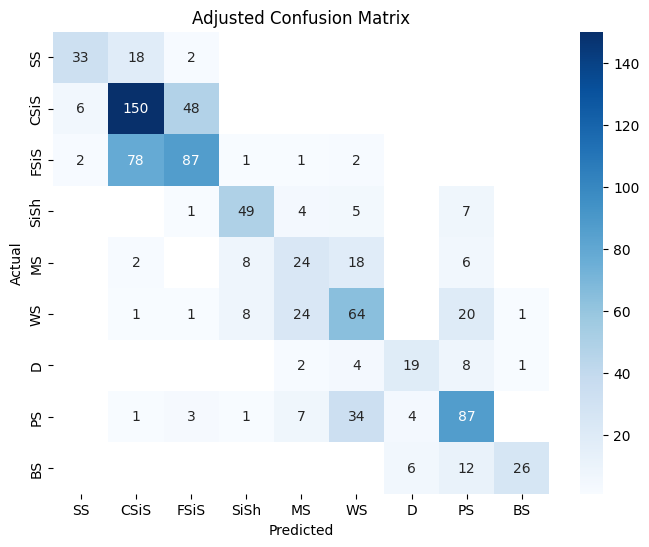

Accuracy: nan


In [ ]:
display_adj_cm(cv_conf, facies_labels, adjacent_facies,
           display_metrics=True, hide_zeros=True)

In [ ]:
blind

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,2,A1 SH,SHANKLE,2774.5,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,2,A1 SH,SHANKLE,2775.0,97.57,0.631,7.9,16.745,3.2,1,0.984
939,2,A1 SH,SHANKLE,2775.5,98.41,0.615,12.8,14.105,3.2,1,0.968
940,2,A1 SH,SHANKLE,2776.0,85.92,0.597,13.0,13.385,3.4,1,0.952
941,2,A1 SH,SHANKLE,2776.5,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...,...,...,...,...
1381,8,C LM,SHANKLE,3006.0,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,8,C LM,SHANKLE,3006.5,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,8,C LM,SHANKLE,3007.0,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,4,C LM,SHANKLE,3007.5,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [ ]:
y_blind = blind['Facies'].values

In [ ]:
#We can form the feature matrix by dropping some of the columns and making a new dataframe:

In [ ]:
well_features = blind.drop(['Facies', 'Formation', 'Well Name', 'Depth'], axis=1)

In [ ]:
#Now we can transform this with the scaler we made before:

In [ ]:
X_blind = scaler.transform(well_features)

In [ ]:
#Now it's a simple matter of making a prediction and storing it back in the dataframe:

In [ ]:
y_pred = clf.predict(X_blind)
blind['Prediction'] = y_pred

In [ ]:
cv_conf = confusion_matrix(y_blind, y_pred)

print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(cv_conf, adjacent_facies))

Optimized facies classification accuracy = 0.45
Optimized adjacent facies classification accuracy = 0.91


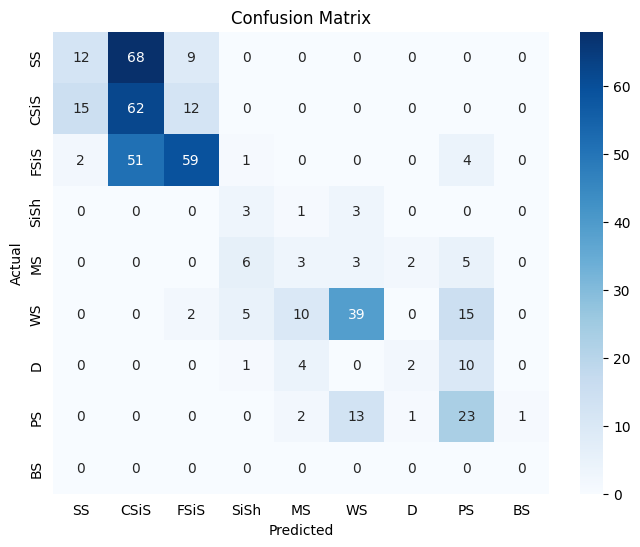

In [ ]:
display_cm(cv_conf, facies_labels,
           display_metrics=True, hide_zeros=True)

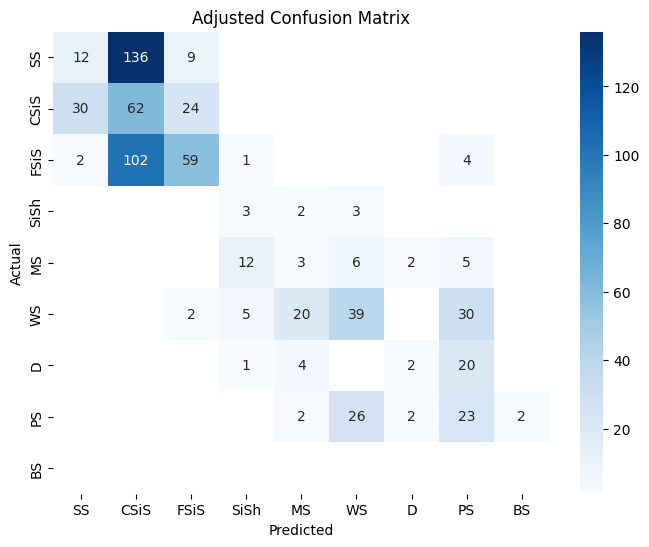

Accuracy: nan


In [ ]:
display_adj_cm(cv_conf, facies_labels, adjacent_facies,
               display_metrics=True, hide_zeros=True)

In [ ]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

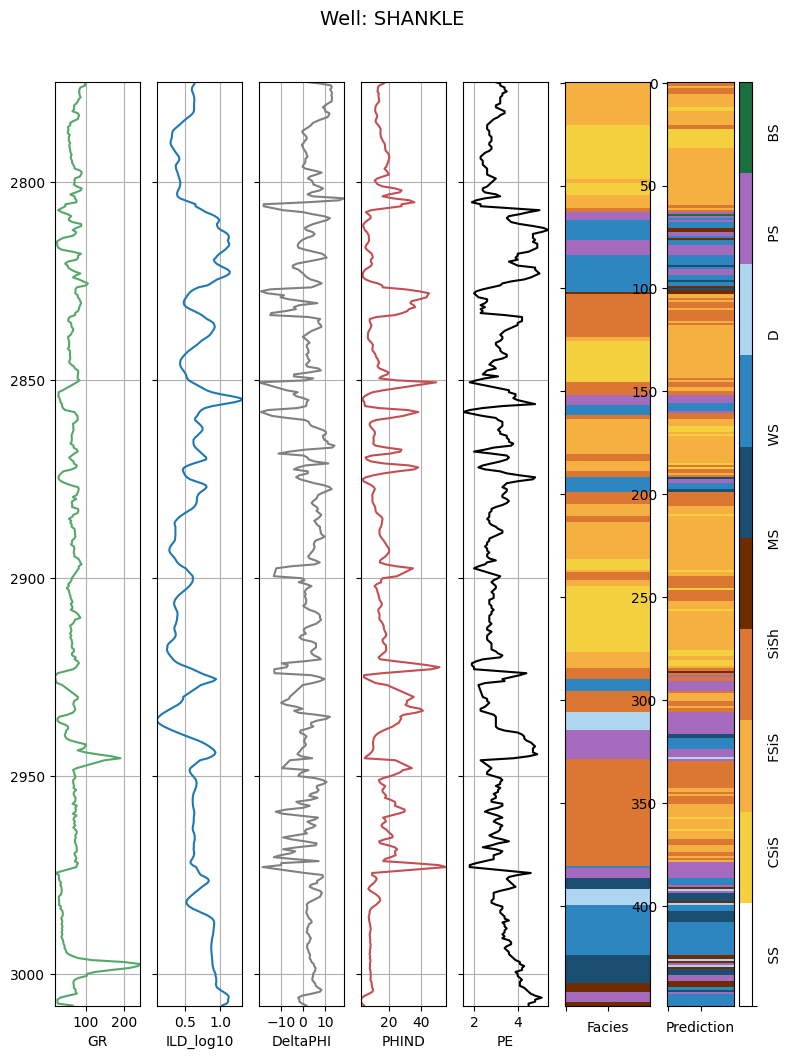

In [ ]:
compare_facies_plot(blind, 'Prediction', facies_colors)

In [ ]:
#Applying the classification model to new data
#Now that we have a trained facies classification model we can use it to identify facies in wells that do not have core data.
#In this case, we will apply the classifier to two wells, but we could use it on any number of wells for which we have the same
#set of well logs for input.

#This dataset is similar to the training data except it does not have facies labels. It is loaded into a dataframe called test_data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving validation_data_nofacies.csv to validation_data_nofacies.csv


In [ ]:
well_data = pd.read_csv('validation_data_nofacies.csv')
well_data['Well Name'] = well_data['Well Name'].astype('category')
well_features = well_data.drop(['Formation', 'Well Name', 'Depth'], axis=1)

In [ ]:
#The data needs to be scaled using the same constants we used for the training data.

In [ ]:
X_unknown = scaler.transform(well_features)

In [ ]:
#Finally we predict facies labels for the unknown data, and store the results in a Facies column of the test_data dataframe.

In [ ]:
#predict facies of unclassified data
y_unknown = clf.predict(X_unknown)
well_data['Facies'] = y_unknown
well_data

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,3
1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,3
2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,3
3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,3
4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,3
...,...,...,...,...,...,...,...,...,...,...,...
825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639,3
826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611,3
827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583,3
828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556,3


In [ ]:
well_data['Well Name'].unique()

['STUART', 'CRAWFORD']
Categories (2, object): ['CRAWFORD', 'STUART']

In [ ]:
#We can use the well log plot to view the classification results along with the well logs.

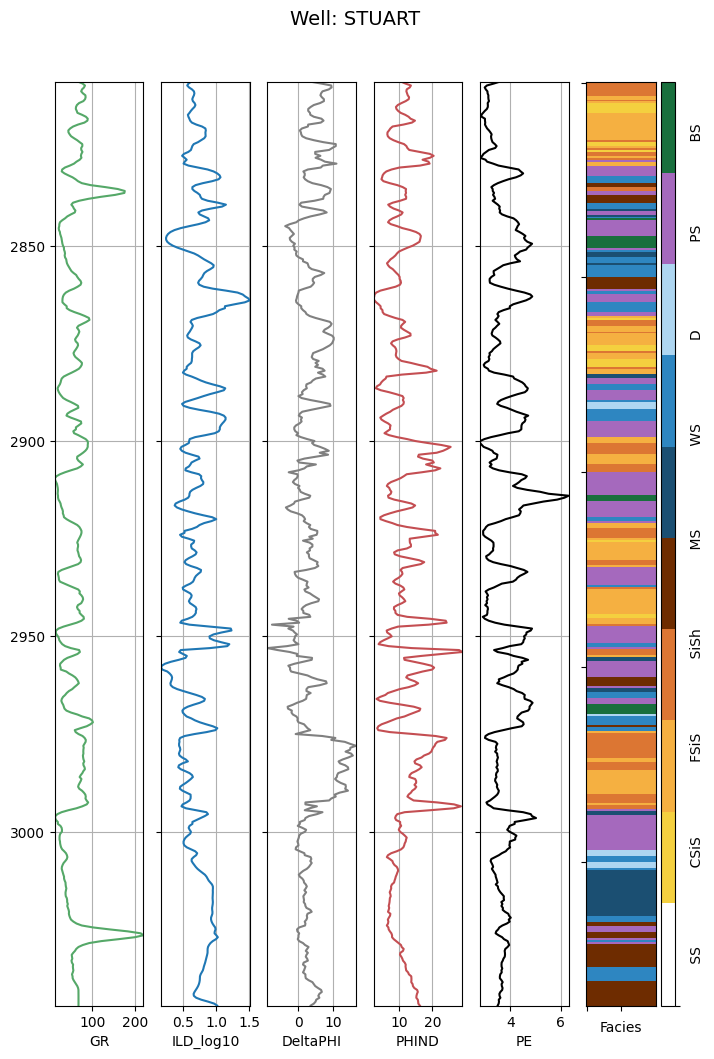

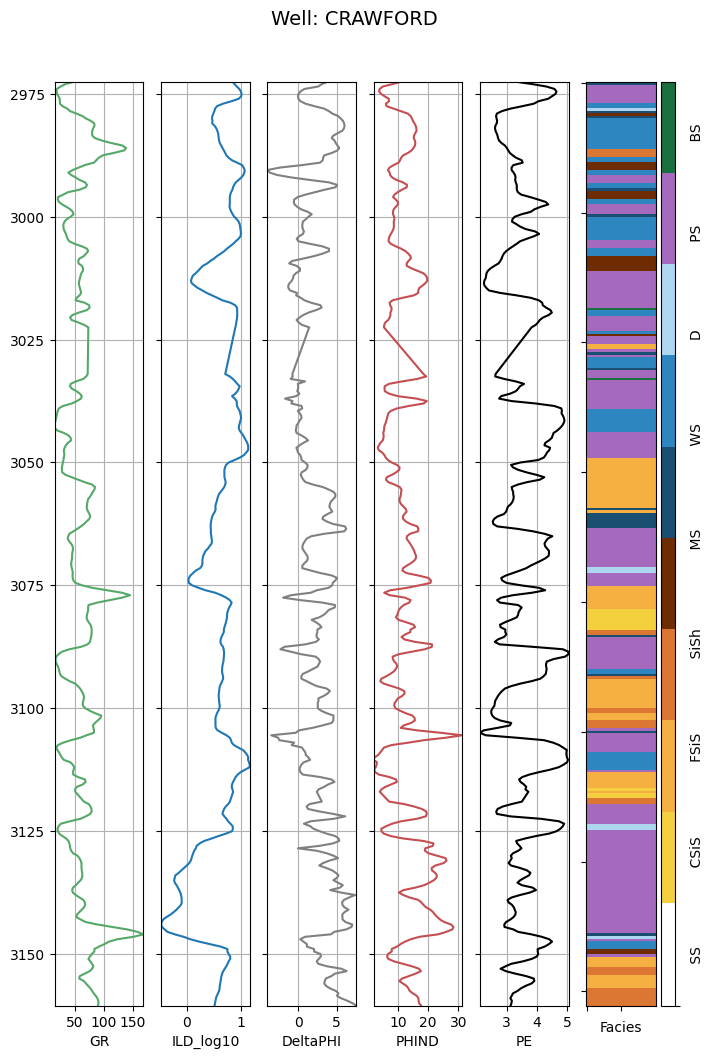

In [ ]:
make_facies_log_plot(
    well_data[well_data['Well Name'] == 'STUART'],
    facies_colors=facies_colors)

make_facies_log_plot(
    well_data[well_data['Well Name'] == 'CRAWFORD'],
    facies_colors=facies_colors)

In [ ]:
#Finally we can write out a csv file with the well data along with the facies classification results.

In [ ]:
well_data.to_csv('well_data_with_facies.csv')

In [ ]:
from google.colab import files
files.download('well_data_with_facies.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>